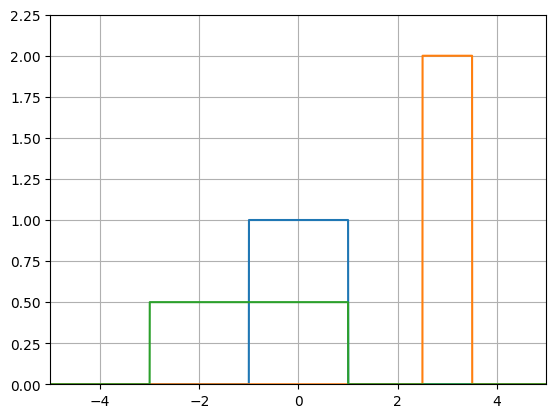

In [26]:
import numpy as np
import matplotlib.pyplot as plt

sampling_rate = 1000
observed_time = 10.0

time = np.linspace(-observed_time/2, observed_time/2, int(sampling_rate*observed_time)+1, endpoint =True)
#print(time)

#square wave
def sq_gen(x,a,start,end):
    return a if start<=x<=end else 0
def square_wave(amplitude,duration,shift):   
    return np.array([sq_gen(t,amplitude,-duration/2 + shift,duration/2 + shift) for t in time])

wave1 = square_wave(1.0,2.0,0.0)
wave2 = square_wave(2.0,1.0,3.0)
wave3 = square_wave(0.5,4.0,-1.0)

plt.plot(time, wave1)
plt.plot(time, wave2)
plt.plot(time, wave3)
    
ax = plt.gca()
ax.set_xlim(-5, 5)  # Set X-axis limits
ax.set_ylim(-0.0, 2.25)  # Set Y-axis limits
ax.grid(True)  # Show grid lines



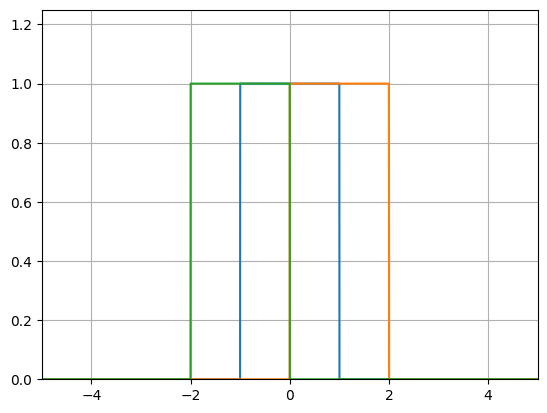

In [30]:
#shifting
def shift(wave,shift_amt):
    if shift_amt==0:
        return wave
    if shift_amt>0:
        return np.concatenate((np.zeros(int(shift_amt*sampling_rate)), wave[:int(-shift_amt*sampling_rate)]))
    return np.concatenate( (wave[int(-shift_amt*sampling_rate):], np.zeros(int(-shift_amt*sampling_rate)) ) )

wave4 = shift(wave1,1.0)
wave5 = shift(wave1,-1.0)
plt.plot(time,wave1)
plt.plot(time,wave4)
plt.plot(time,wave5)
ax = plt.gca()
ax.set_xlim(-5, 5)  # Set X-axis limits
ax.set_ylim(0.0, 1.25)  # Set Y-axis limits
ax.grid(True)  # Show grid lines



In [39]:
array = [0,1,2,3,4,5,6,7,8,9,10]
print(array)
print(array[1:(3+1)])
print(array[2:])
print(array[:2])
print(array[-2:])
print(array[:-2])
print(array[::3])
print(array[1::3])
print(array[-1::-3])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1, 2, 3]
[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1]
[9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 3, 6, 9]
[1, 4, 7, 10]
[10, 7, 4, 1]


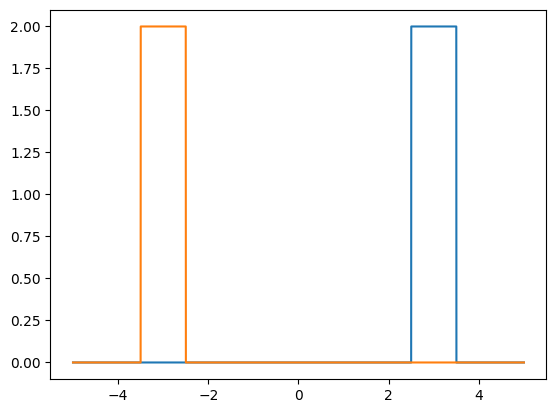

In [40]:
#time reversal and compression
def scale(wave,scaling_factor):
    return wave[::int(scaling_factor)]
wave6 = scale(wave2,-1)
plt.plot(time,wave2)
plt.plot(time,wave6)

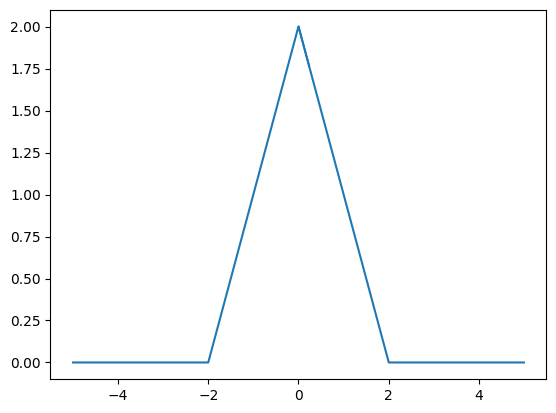

In [45]:
# convolution = integral(x(T)y(t-T)dT)
dT = 1/sampling_rate
def convolve(wave1,wave2):
    return np.array([np.sum( wave1 * scale(shift(wave2,-t),-1) *dT) for t in time ])
plt.plot(time, convolve(wave1,wave1))

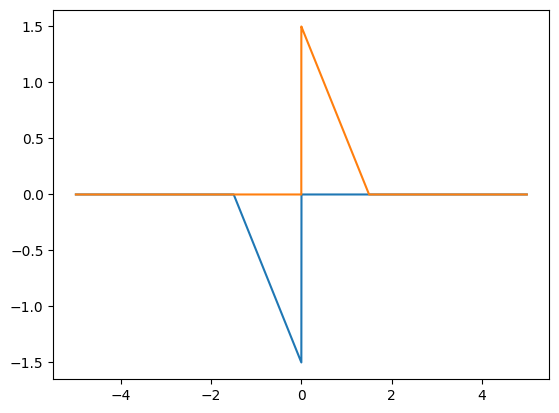

In [50]:
#ramp function
#slope,c,duration

def ramp(t,slope,c,start,end):
    return t*slope+c if start<=t<=end else 0

wave7 = np.array([ramp(t,-1.0,-1.5,-1.5,0) for t in time])
wave8 = -1*scale(wave7,-1)
plt.plot(time,wave7)
plt.plot(time,wave8)
    
#wave7

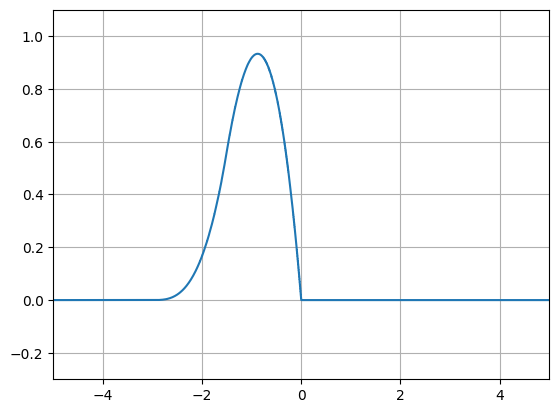

In [49]:
plt.plot(time,convolve(wave7,wave7))
ax = plt.gca()
ax.set_xlim(-5, 5)  # Set X-axis limits
ax.set_ylim(-0.3, 1.1)  # Set Y-axis limits
ax.grid(True)  # Show grid lines

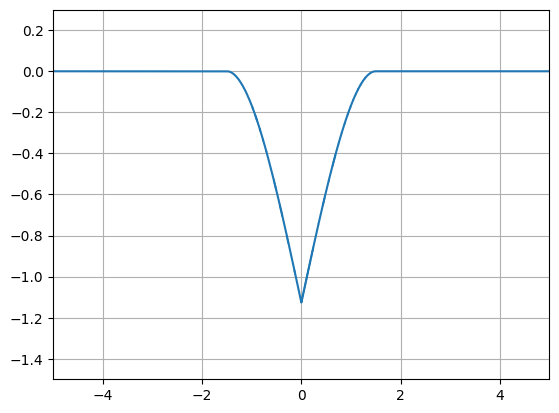

In [53]:
plt.plot(time,convolve(wave7,wave8))
ax = plt.gca()
ax.set_xlim(-5, 5)  # Set X-axis limits
ax.set_ylim(-1.5, 0.3)  # Set Y-axis limits
ax.grid(True)  # Show grid lines